In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

Obtenemos el GT de SOH de la celda W9

In [46]:
# Obtenemos el ground truth
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/stanford_cell_SOH.csv"
SOH_gt_df = pd.read_csv(path,delimiter=';',)
SOH_gt_df = SOH_gt_df.drop(index=0).reset_index(drop=True)

path = os.path.join('C:/Users/Bruno/Dropbox','Dataset Stanford', 'W10')
files = os.listdir(path)
files.sort(key=lambda x: int(x[1 : x.find(".")]))

SOH_gt_df["files"] = files

# Display the updated DataFrame
SOH_gt_df

,W3,W4,W5,W7,W8,W9,W10,G1,V4,V5,files
0,0.991165,0.995239,0.995041,0.990868,0.991326,0.991863,0.993366,0.986739,0.991591,0.996553,C1.csv
1,0.981574,0.984155,0.984068,0.977048,0.978800,0.978999,0.979203,0.973698,0.984149,0.980047,C2.csv
2,0.000000,0.964448,0.972587,0.966905,0.969747,0.968954,0.966177,0.963144,0.976851,0.968160,C3.csv
3,0.000000,0.953926,0.953046,0.000000,0.953927,0.955331,0.954701,0.959798,0.969108,0.000000,C4.csv
4,0.000000,0.958505,0.947708,0.000000,0.951501,0.952444,0.952462,0.958529,0.964674,0.000000,C5.csv
5,0.000000,0.944989,0.940969,0.000000,0.942567,0.943475,0.943691,0.955073,0.960795,0.000000,C6.csv
6,0.000000,0.940327,0.934069,0.000000,0.934454,0.935122,0.935875,0.950352,0.955500,0.000000,C7.csv
7,0.000000,0.000000,0.936182,0.000000,0.929295,0.932702,0.933866,0.947226,0.950634,0.000000,C8.csv
8,0.000000,0.000000,0.933865,0.000000,0.930129,0.932778,0.933686,0.943072,0.947881,0.000000,C9.csv
9,0.000000,0.000000,0.930750,0.000000,0.928541,0.930311,0.930635,0.938144,0.945301,0.000000,C10.csv


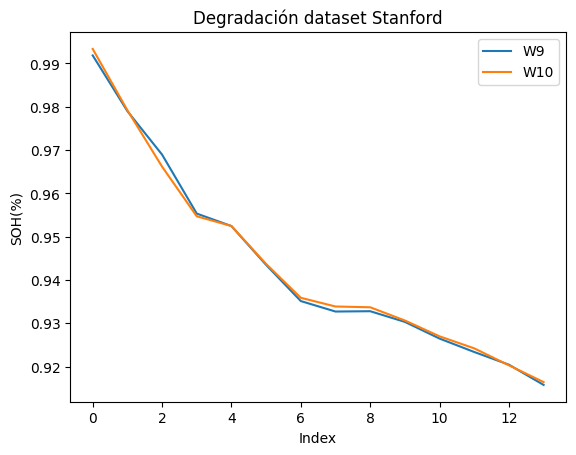

In [47]:
plt.plot(SOH_gt_df['W9'], label="W9")
plt.plot(SOH_gt_df['W10'], label="W10")

plt.title("Degradación dataset Stanford")
plt.xlabel("Index")
plt.ylabel("SOH(%)")
plt.legend()
plt.show()

Obtenemos los ciclos equivalentes en cada tanda de degradación

In [22]:
EQ_cycles = []
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/stanford_cell_cycles.csv"
cell_cycles = pd.read_csv(path,delimiter=';',)
cell_cycles_eq = pd.DataFrame()
SR_0 = 100
SR = 80
acc_subc = 0
for cell in cell_cycles.columns:
    values = cell_cycles[cell]
    for idx,subcycle in enumerate(values):
        eq_cycle = subcycle*(SR/SR_0)
        EQ_cycles.append(eq_cycle)
    cell_cycles_eq[cell] = EQ_cycles
    EQ_cycles = []

,W3,W4,W5,W7,W8,W9,W10,G1,V4,V5
0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,16.0,9.6
1,40.0,40.0,40.0,40.0,40.0,40.0,40.0,4.0,20.0,4.8
2,0.0,38.4,40.0,40.0,40.0,37.6,37.6,5.6,20.0,8.8
3,0.0,7.2,27.2,12.8,18.4,17.6,19.2,20.0,20.0,0.0
4,0.0,21.6,6.4,0.0,1.6,0.8,1.6,20.0,20.0,0.0
5,0.0,13.6,16.0,0.0,0.8,0.8,2.4,20.0,20.0,0.0
6,0.0,2.4,5.6,0.0,4.8,3.2,6.4,20.0,20.0,0.0
7,0.0,0.0,20.0,0.0,22.4,23.2,23.2,20.0,19.2,0.0
8,0.0,0.0,20.0,0.0,29.6,29.6,29.6,20.0,20.0,0.0
9,0.0,0.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0,0.0


In [83]:
SOH_gt_df["W5"][13]

0.916400064

Obtenemos los valores de \eta por tanda de degradación

In [85]:
def fill_with_nan(input_list, desired_length):
    # Calculate the number of NaN values needed
    num_nan_to_add = desired_length - len(input_list)
    
    # If the current length is less than the desired length, add NaN values
    if num_nan_to_add > 0:
        input_list.extend([np.nan] * num_nan_to_add)
    
    # If the list is longer than the desired length, it will be truncated
    return input_list[:desired_length]


eta_values = pd.DataFrame(columns=cell_cycles_eq.columns)
cell_eta_values = []
for cell in cell_cycles.columns:
    SOH_0 = 1
    for idx,cycle in enumerate(cell_cycles_eq[cell]):
        SOH_k = SOH_gt_df[cell][idx]
        if SOH_k == 0:
            break
        else:
            eta_k = (SOH_k/SOH_0)**(1/cycle)
            cell_eta_values.append(eta_k)
            SOH_0 = SOH_k
    cell_eta_values = fill_with_nan(cell_eta_values,14)
    eta_values[cell] = cell_eta_values
    cell_eta_values = []
eta_values 

,W3,W4,W5,W7,W8,W9,W10,G1,V4,V5
0,0.999556,0.999761,0.999751,0.999541,0.999564,0.999592,0.999667,0.999333,0.999472,0.999640
1,0.999757,0.999720,0.999723,0.999649,0.999682,0.999674,0.999641,0.996680,0.999623,0.996527
2,NaN,0.999473,0.999707,0.999739,0.999768,0.999726,0.999644,0.998056,0.999628,0.998614
3,NaN,0.998477,0.999254,NaN,0.999106,0.999196,0.999378,0.999826,0.999602,NaN
4,NaN,1.000222,0.999123,NaN,0.998410,0.996223,0.998534,0.999934,0.999771,NaN
5,NaN,0.998956,0.999554,NaN,0.988276,0.988244,0.996152,0.999819,0.999799,NaN
6,NaN,0.997942,0.998686,NaN,0.998201,0.997225,0.998701,0.999752,0.999724,NaN
7,NaN,NaN,1.000113,NaN,0.999753,0.999888,0.999907,0.999835,0.999734,NaN
8,NaN,NaN,0.999876,NaN,1.000030,1.000003,0.999993,0.999780,0.999855,NaN
9,NaN,NaN,0.999833,NaN,0.999915,0.999868,0.999836,0.999738,0.999864,NaN


Obenemos la media y varianza de los valores de eta

In [86]:
total_eta_values = []
for cell in eta_values.columns:
    non_nan_values = [x for x in list(eta_values[cell].values) if not np.isnan(x)]
    for elem in non_nan_values:
        total_eta_values.append(elem)

In [87]:
mean_value = np.mean(total_eta_values)
std_dev_value = np.std(total_eta_values, ddof=1)  # ddof=1 for sample standard deviation (unbiased)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

Mean: 0.999161393145505
Standard Deviation: 0.0018397938597426776


Graficamos los valores de eta en función del SOH

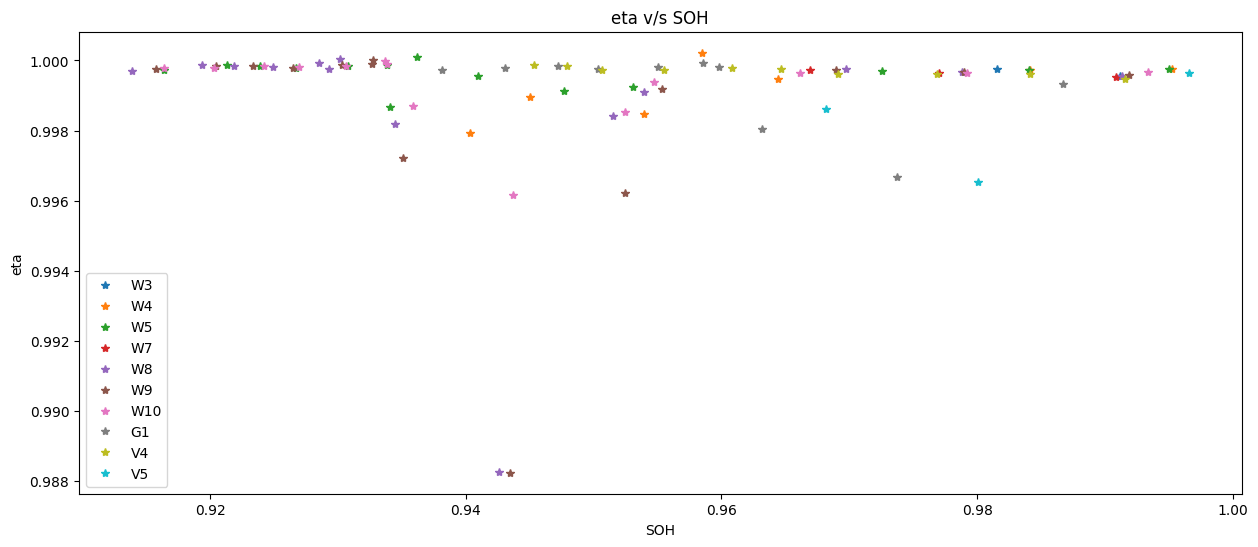

In [91]:
plt.figure(figsize=(15, 6))
for cell in eta_values.columns:
    eta_values_ = eta_values[cell]
    Soh_values = SOH_gt_df[cell]
    plt.plot(Soh_values, eta_values_, '*', label=cell, linestyle='none')
plt.title("eta v/s SOH")
plt.xlabel("SOH")
plt.ylabel("eta")
plt.legend()
plt.show()